## Import libraries

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import os

root_dir = "/beegfs/halder/GITHUB/RESEARCH/INDI-Res/"
os.chdir(root_dir)
data_dir = os.path.join(root_dir, 'data')

## Read the datasets

In [17]:
# Read the shapefile of India
india_boundary_path = os.path.join(data_dir, 'external', 'India_Boundary', 'India_Country_Boundary.shp')
india_boundary = gpd.read_file(india_boundary_path)
print(india_boundary.shape)
india_boundary.head()

(253, 2)


,Area,geometry
0,34.567532,"MULTIPOLYGON (((8135256.29 930182.487, 8135260..."
1,7658.811873,"MULTIPOLYGON (((10341718.474 1449533.161, 1034..."
2,0.189256,"POLYGON ((8738079.921 1015796.91, 8738024.198 ..."
3,0.190283,"POLYGON ((8849448.115 1020142.339, 8849498.727..."
4,0.022418,"POLYGON ((8848644.239 1020377.781, 8848625.487..."


In [18]:
# Read the Global DAM Watch v1.0 database
gdw_reservoirs_data = gpd.read_file(os.path.join(data_dir, 'external', 'GDW_v1_0', 'GDW_reservoirs_v1_0.shp'))
gdw_reservoirs_data = gdw_reservoirs_data.to_crs(crs=india_boundary.crs)

gdw_barriers_data = gpd.read_file(os.path.join(data_dir, 'external', 'GDW_v1_0', 'GDW_barriers_v1_0.shp'))
gdw_barriers_data = gdw_barriers_data.to_crs(crs=india_boundary.crs)

# Subset the data for India
gdw_reservoirs_subset = gpd.sjoin(left_df=gdw_reservoirs_data, right_df=india_boundary, predicate='intersects')
gdw_barriers_subset = gpd.sjoin(left_df=gdw_barriers_data, right_df=india_boundary, predicate='intersects')

gdw_reservoirs_subset = gdw_reservoirs_subset.iloc[:, :-2].reset_index(drop=True)
gdw_barriers_subset = gdw_barriers_subset.iloc[:, :-2].reset_index(drop=True)
gdw_reservoirs_bounds = gdw_reservoirs_subset.copy()
gdw_reservoirs_bounds['geometry'] = gdw_reservoirs_bounds.geometry.envelope # bounds for each reservoir

print(gdw_reservoirs_subset.shape, gdw_reservoirs_bounds.shape, gdw_barriers_subset.shape)
gdw_reservoirs_subset.head()

(6201, 72) (6201, 72) (7099, 72)


,GDW_ID,RES_NAME,DAM_NAME,ALT_NAME,DAM_TYPE,LAKE_CTRL,RIVER,ALT_RIVER,MAIN_BASIN,SUB_BASIN,...,LONG_DAM,LAT_DAM,ORIG_SRC,POLY_SRC,GRAND_ID,HYRIV_ID,INSTREAM,HYLAK_ID,HYBAS_L12,geometry
0,312,Mangla,Mangla,None,Dam,None,Jhelum,None,Indus,None,...,0.0,0.0,GRanD,McGill,4707,40574361,Instream,1408,4121400010,"POLYGON ((8194244.771 3938155.352, 8193914.393..."
1,315,Beas,Pong Dam,Beas Project,Dam,None,Beas,None,None,None,...,0.0,0.0,GRanD,SWBD,4792,40612987,Instream,1423,4120705280,"POLYGON ((8457562.618 3776623.086, 8457621.692..."
2,323,Rana Pratap,Rana Pratap Sagar,Ranapratap Sagar,Dam,None,Chambol,None,Ganges,None,...,0.0,0.0,GRanD,SWBD,4836,40977023,Instream,1481,4120926190,"POLYGON ((8415629.227 2866599.209, 8415447.763..."
3,325,Gandhi,Gandhi Sagar,Gandhisagar Reservoir,Dam,None,Local Nalla,None,Ganges,None,...,0.0,0.0,GRanD,McGill,4843,40992988,Instream,1484,4120932040,"POLYGON ((8412661.621 2834993.777, 8412660.971..."
4,326,Govind Ballabah Pant,Rihand,Gobind Ballabh Pant Sagar,Dam,None,Rihand,None,None,None,...,0.0,0.0,GRanD,SWBD,4858,41017753,Instream,1487,4121512910,"POLYGON ((9219387.884 2777565.993, 9219418.081..."


## Plot the data

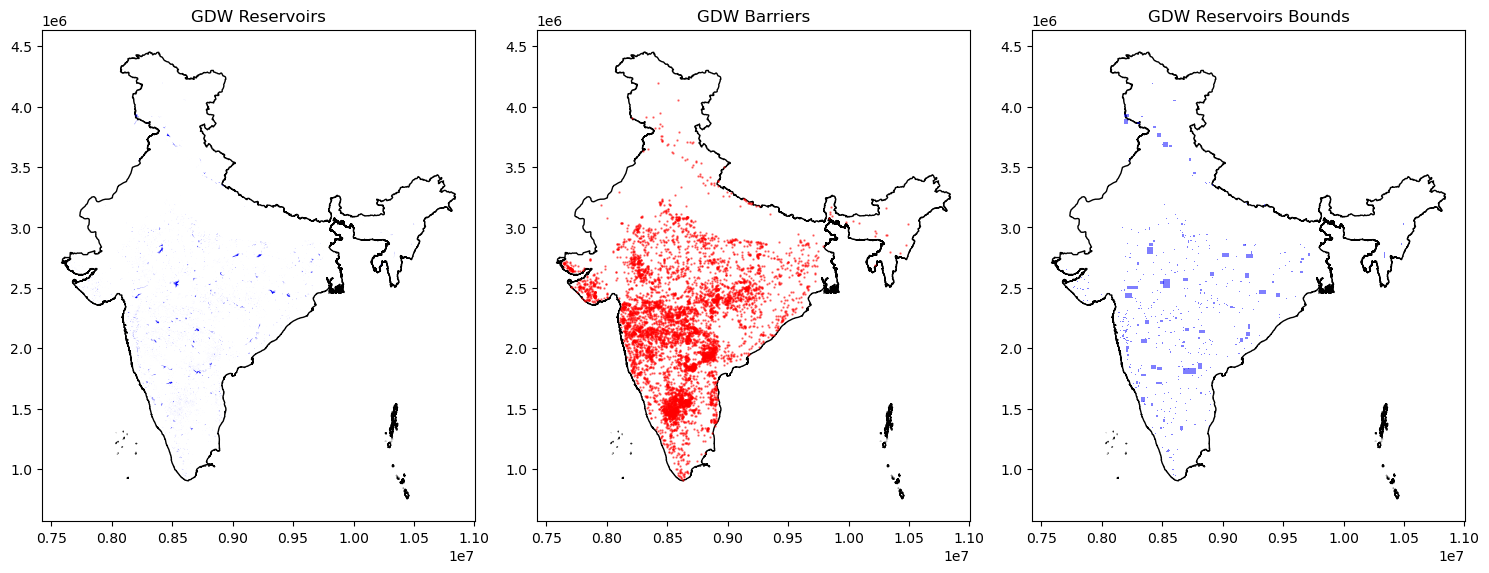

In [19]:
# Plot the data
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

india_boundary.plot(ax=axes[0], color='none', edgecolor='k', linewidth=1)
gdw_reservoirs_subset.plot(ax=axes[0], color='blue')
axes[0].set_title('GDW Reservoirs')

india_boundary.plot(ax=axes[1], color='none', edgecolor='k', linewidth=1)
gdw_barriers_subset.plot(ax=axes[1], color='red', markersize=0.5, alpha=0.5)
axes[1].set_title('GDW Barriers')

india_boundary.plot(ax=axes[2], color='none', edgecolor='k', linewidth=1)
gdw_reservoirs_bounds.plot(ax=axes[2], color='blue', markersize=0.5, alpha=0.5)
axes[2].set_title('GDW Reservoirs Bounds')

plt.tight_layout()
plt.show()

## Save the data

In [ ]:
# gdw_reservoirs_subset.to_file(os.path.join(data_dir, 'processed', 'GDW_reservoirs_v1_0_IN.gpkg'))
# gdw_barriers_subset.to_file(os.path.join(data_dir, 'processed', 'GDW_barriers_v1_0_IN.gpkg'))